<h1> Only use Lednev data</h1>


In [1]:
# own skrips
import helperfile as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm

In [2]:
def loss_flip_weighted(y_true, y_pred):
    bs = int(tf.size(y_true)/6) # batchsize
    ort_AL = 0.5 # cm
    E_AL = 2.5 # GeV
    weights = [tf.ones(bs)*ort_AL, tf.ones(bs)*ort_AL, tf.ones(bs)*E_AL, tf.ones(bs)*ort_AL, tf.ones(bs)*ort_AL, tf.ones(bs)*E_AL]
    sq = k.square((y_true - y_pred) / tf.transpose(weights))
    mse = k.sum(sq, axis=1)
    
    y_pred_flipped = tf.roll(y_pred, 3, axis=1)
    sq_flipped = k.square((y_true - y_pred_flipped) / tf.transpose(weights))
    mse_flipped = k.sum(sq_flipped, axis=1)
    vec = tf.stack([mse, mse_flipped], axis=1)
    loss = k.min(vec, axis=1)
    return loss

In [3]:
rootfile = uproot.open('./stage4_clusters_minDist2cm.root')
ipd = hf.InputData_2photon(rootfile, sort_cond='none')
ipd.form_cluster()
ipd.cut_onlycoraldata()
ipd.train_test_split()

Initialized object
Start shaping clusters in a  (9, 9)  grid...
Shaping the clusters took  458.1648452281952 s
Cutted  1051598  to only use data with correct Lednev identification.
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [4]:
def flip_output_weights(output):
    '''out is output of NN'''
    ort_AL = 0.5 # cm
    E_AL = 2.5 # GeV
    weights = np.ones((len(output), 6)) * np.array([ort_AL, ort_AL, E_AL, ort_AL, ort_AL, E_AL])
    #out_w = out/weights
    output_flipped = np.roll(output, 3, axis=1)
    mse = np.sum(np.square(output/weights-ipd.veri_truth/weights), axis=1)
    mse_flipped = np.sum(np.square(output_flipped/weights-ipd.veri_truth/weights), axis=1)
    ind_flip = np.where(mse_flipped<mse)
    output[ind_flip] = np.roll(output[ind_flip], 3, axis=1)
    return output

In [6]:
model= keras.models.load_model('models/model_st4_coraldata', custom_objects={'loss_flip_weighted': loss_flip_weighted})
output = model.predict(ipd.clusters_v)
output_= flip_output_weights(output)
ev = hf.Evaluation_2photon(ipd, output)

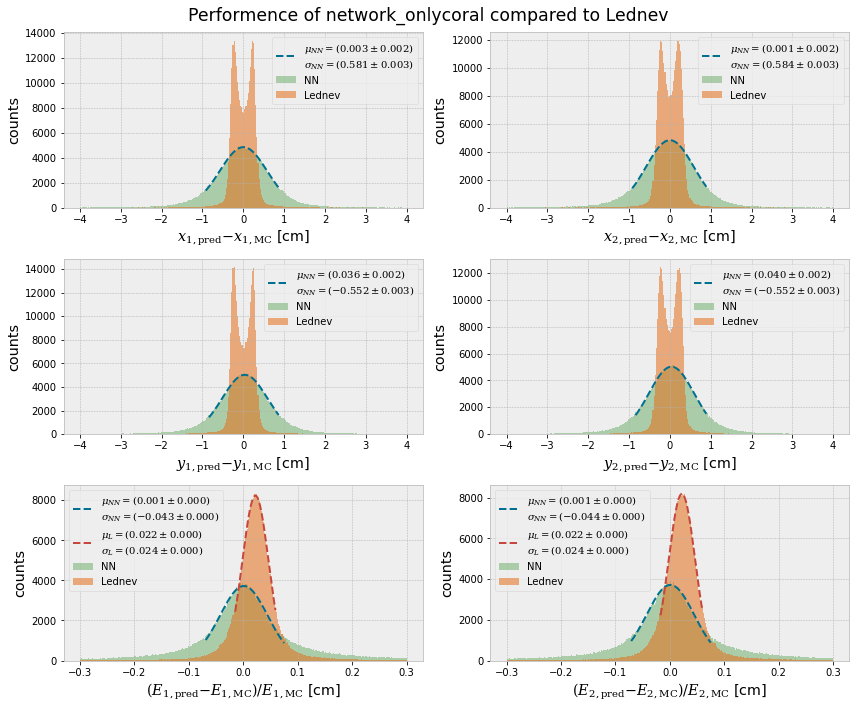

In [13]:
ev_fit_v_Lednev = ev.show_hist_NN_withLednev(figsave=(False, "network_onlycoral"))

In [8]:
print(len(ev.x1), len(ev.x1_c))
print(len(np.where(ipd.x_fit_veri.T[0].T==-1000)[0]))

287189 287189
0


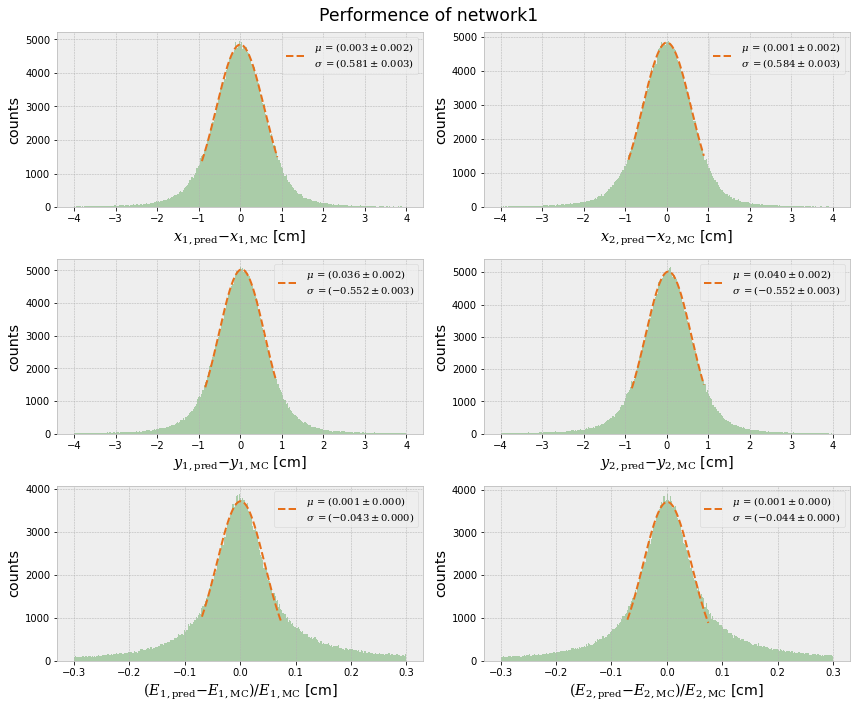

In [9]:
ev_fit = ev.show_hist_NN()

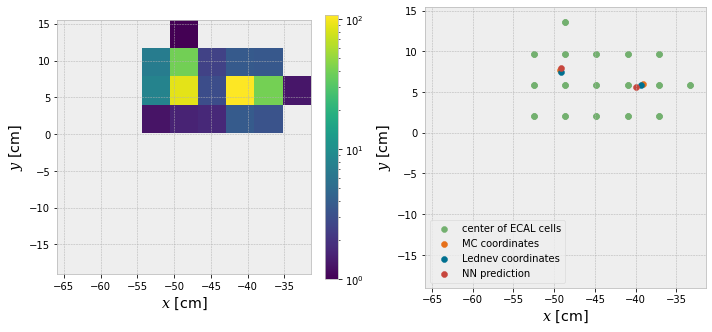

0


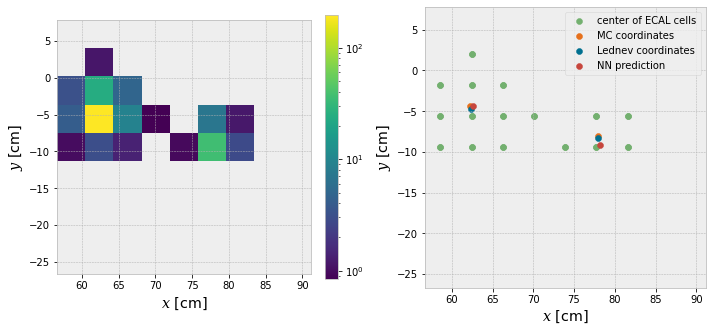

1


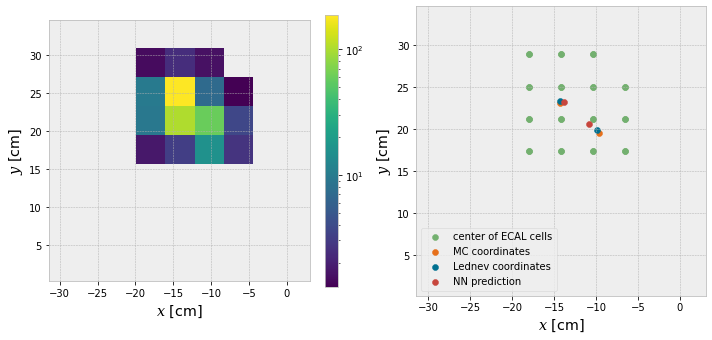

2


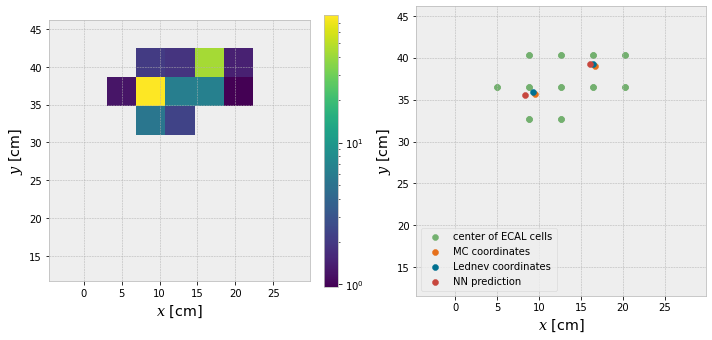

3


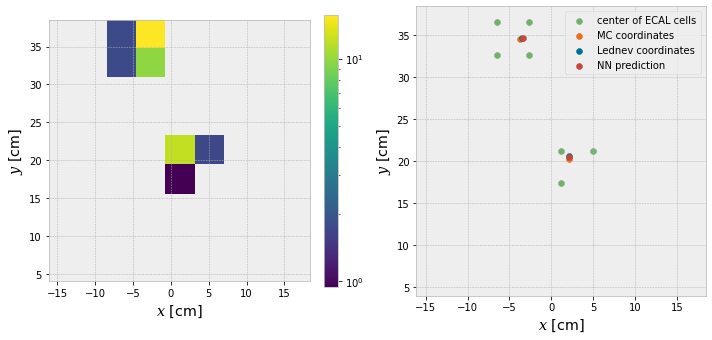

4


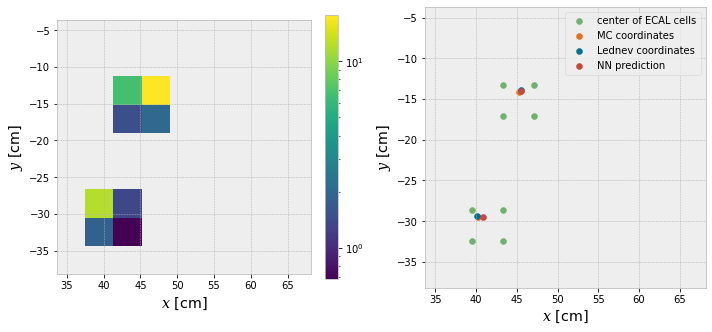

5


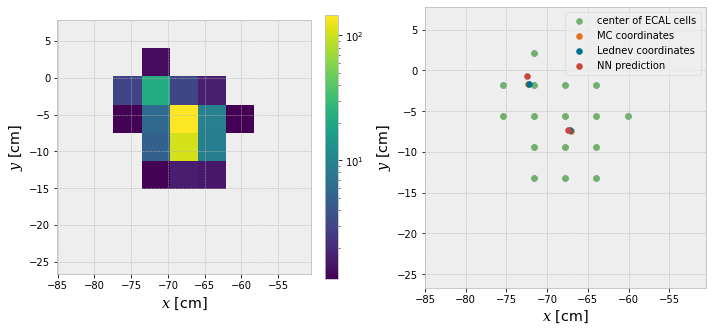

6


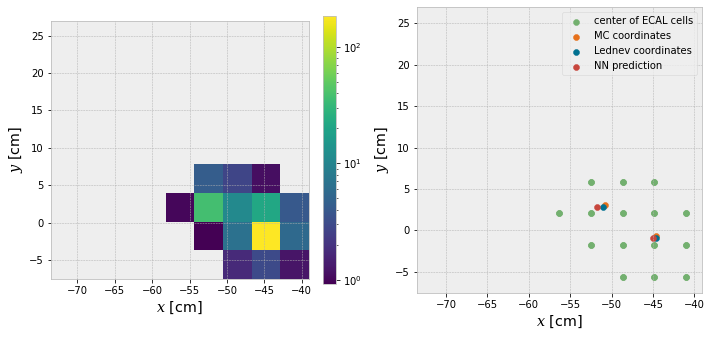

7


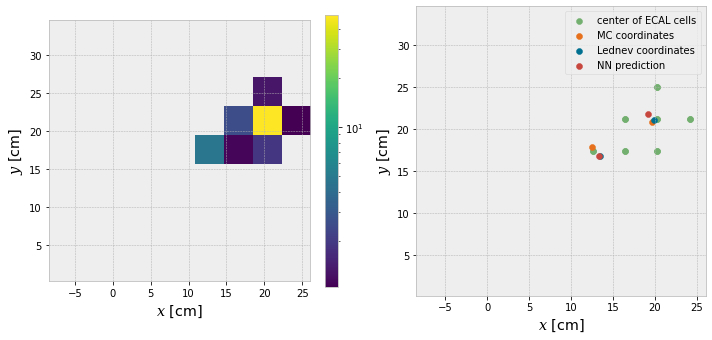

8


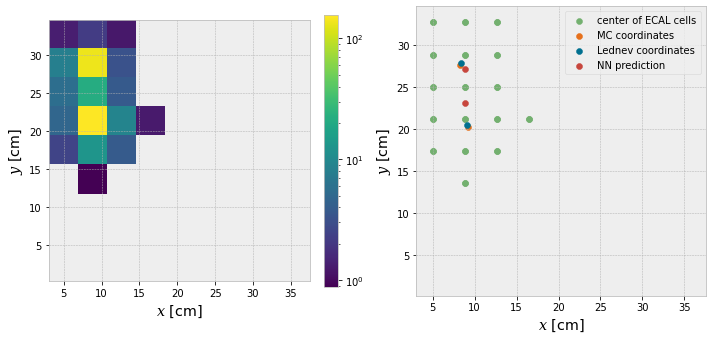

9


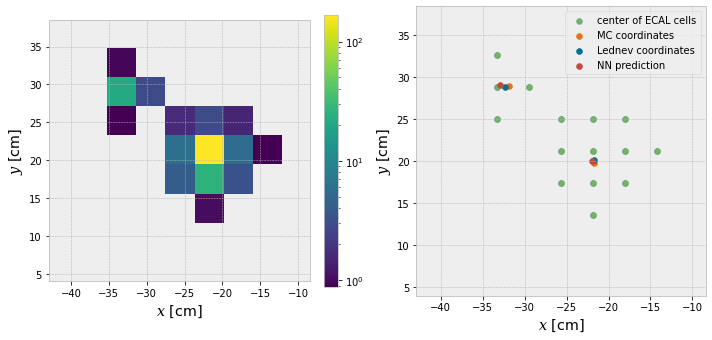

10


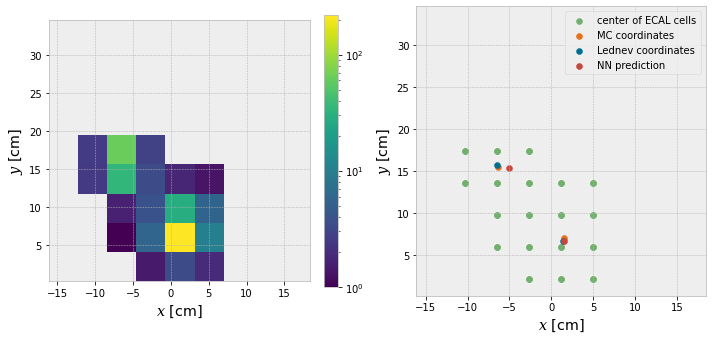

11


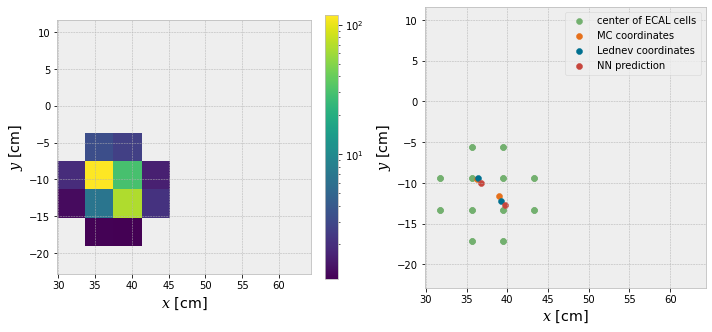

12


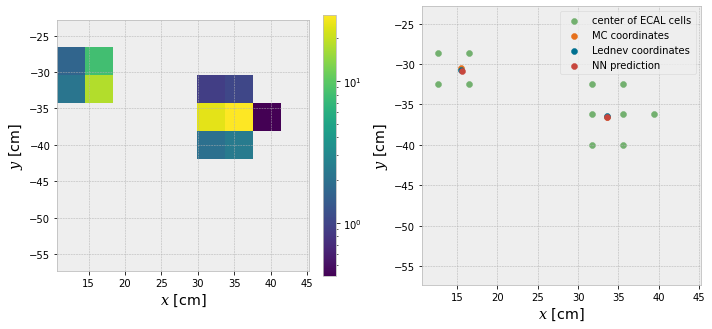

13


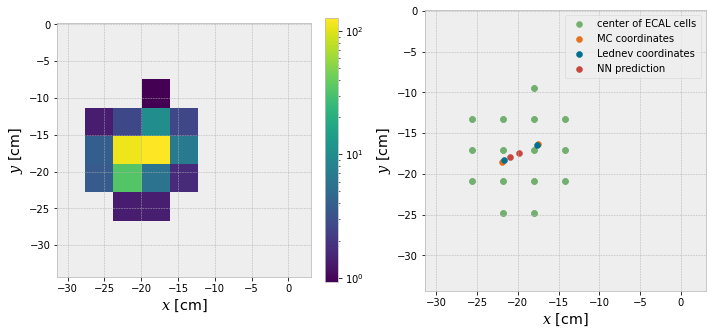

14


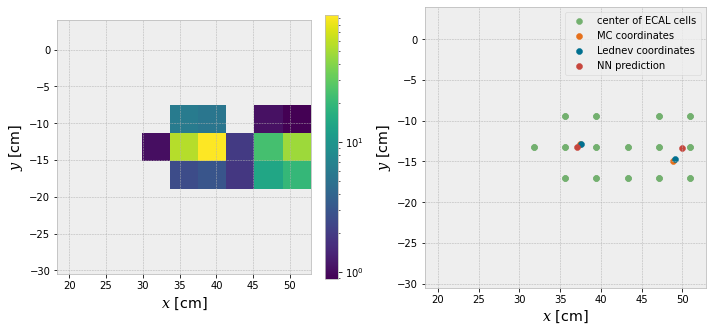

15


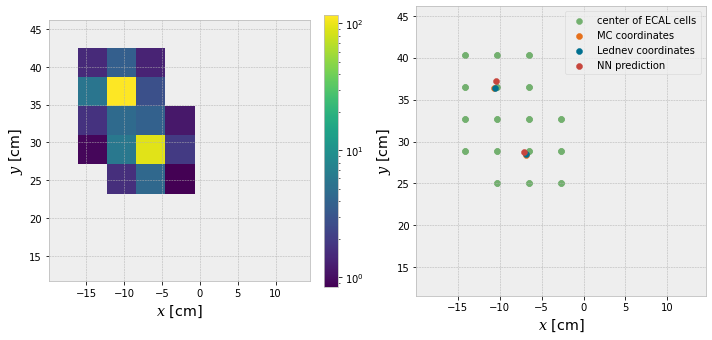

16


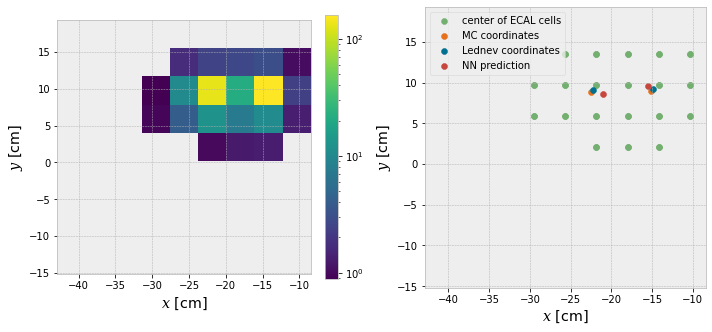

17


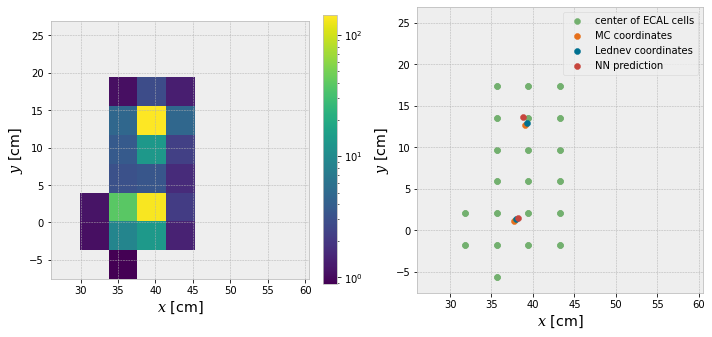

18


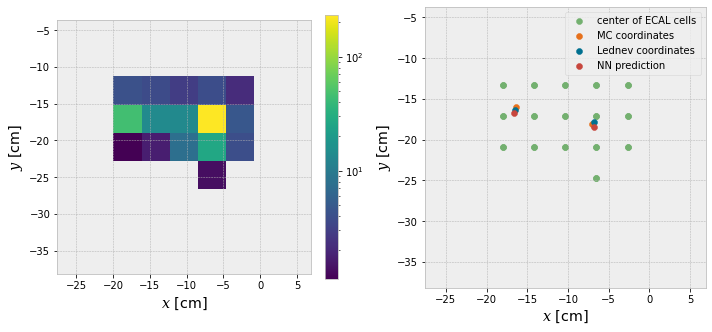

19


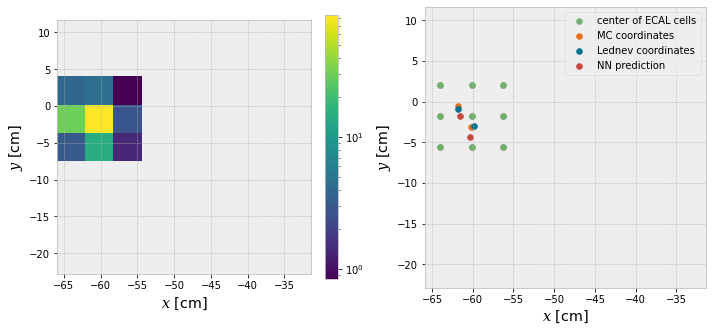

20


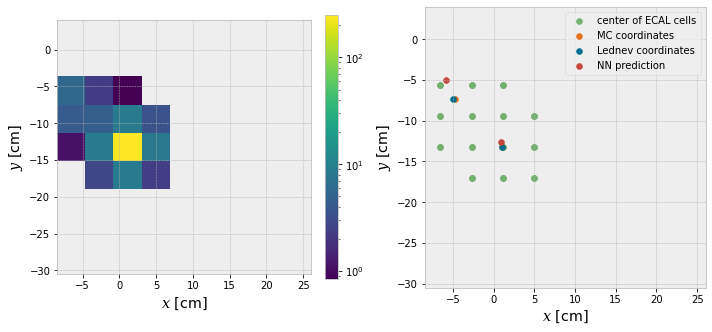

21


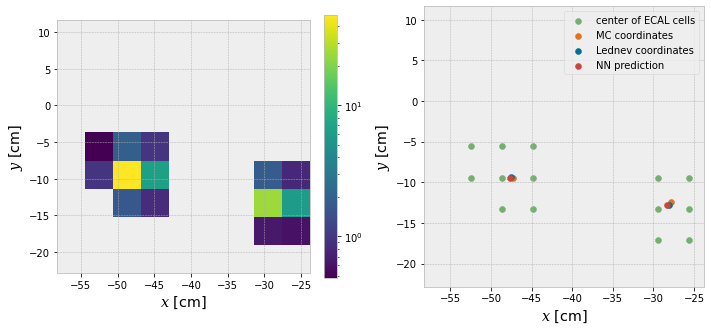

22


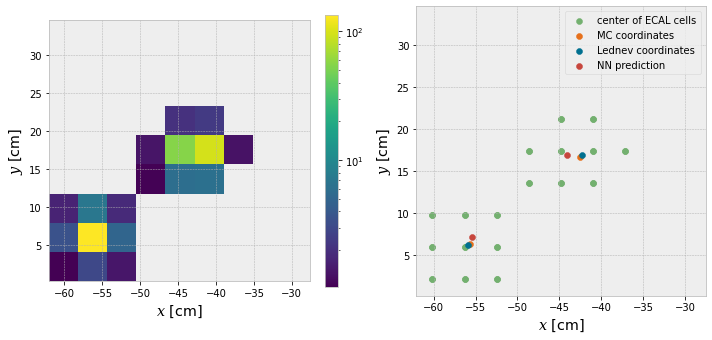

23


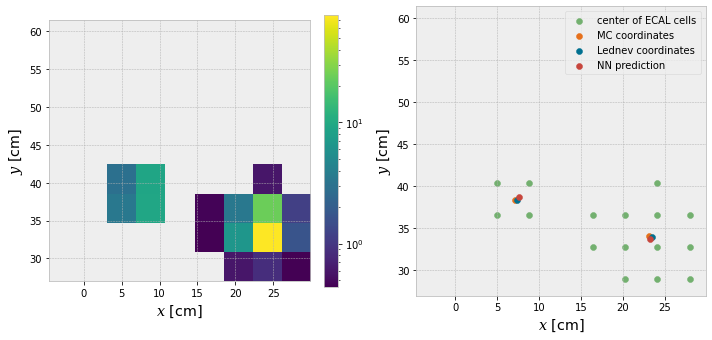

24


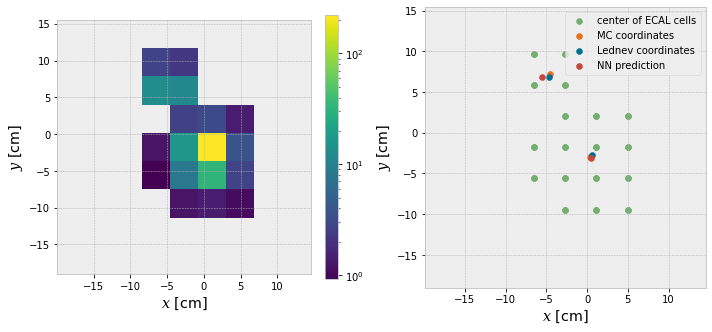

25


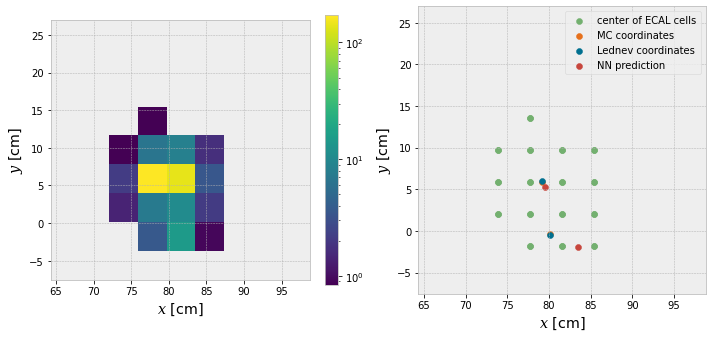

26


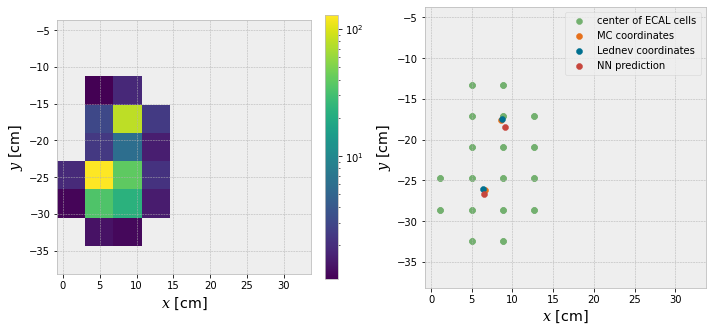

27


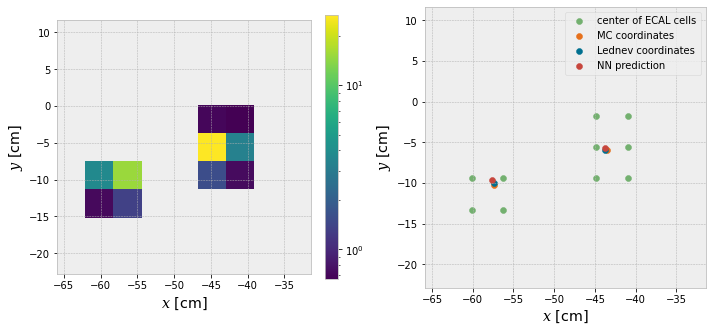

28


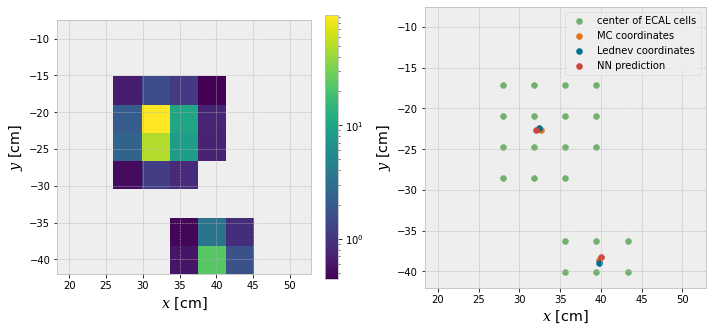

29


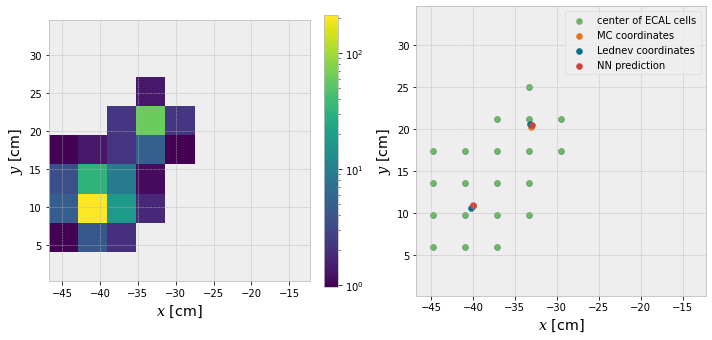

30


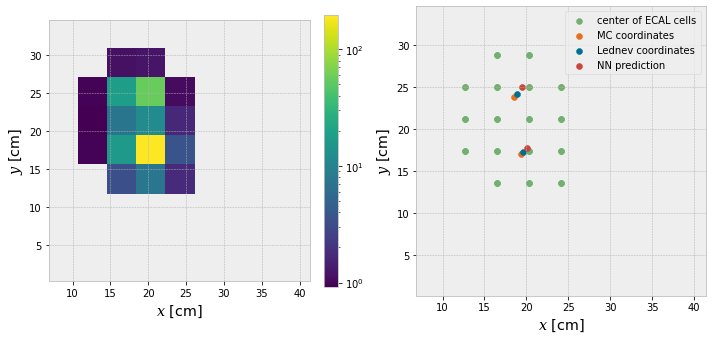

31


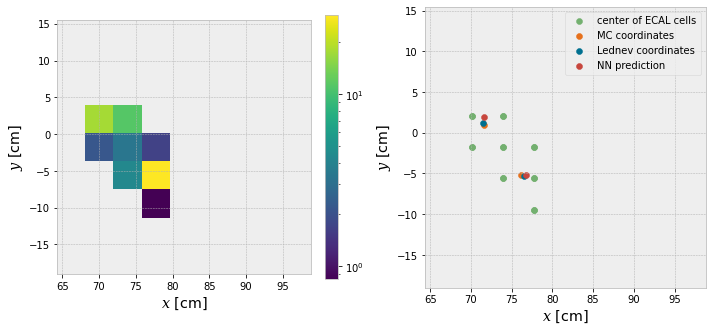

32


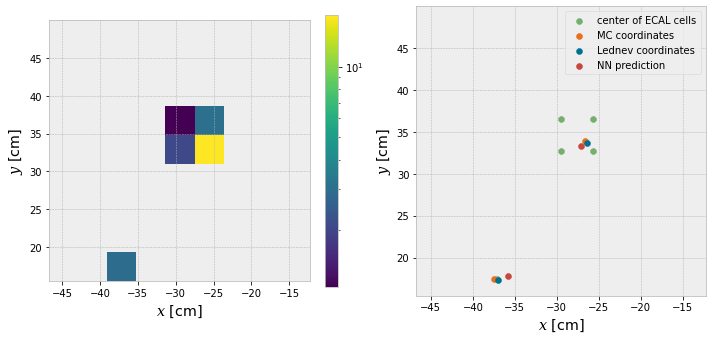

33


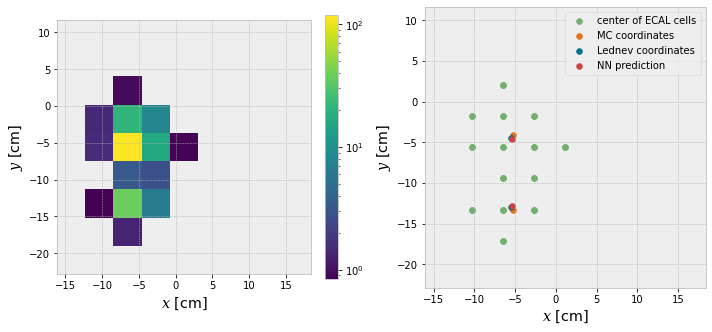

34


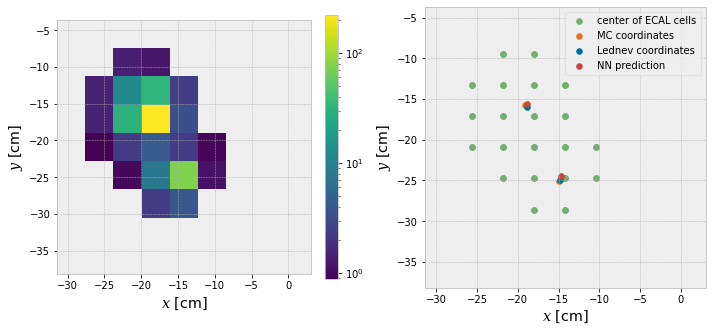

35


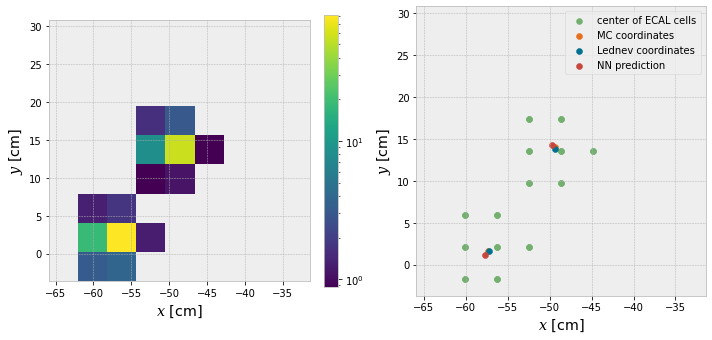

36


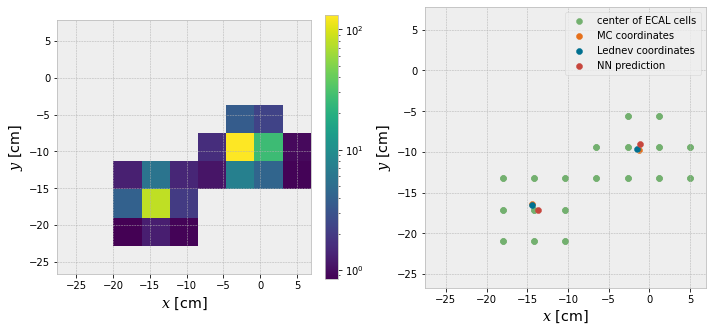

37


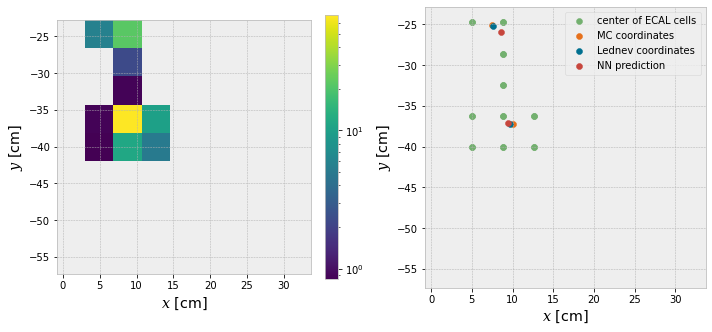

38


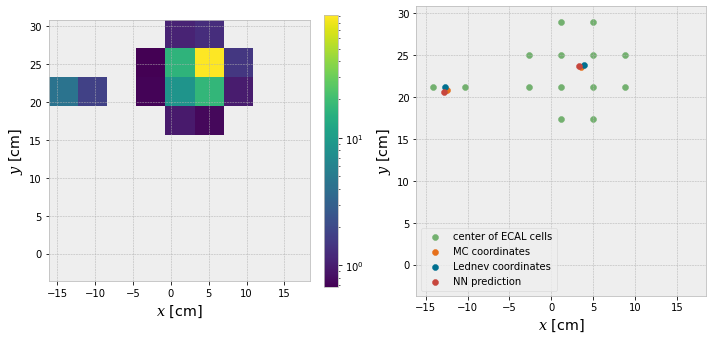

39


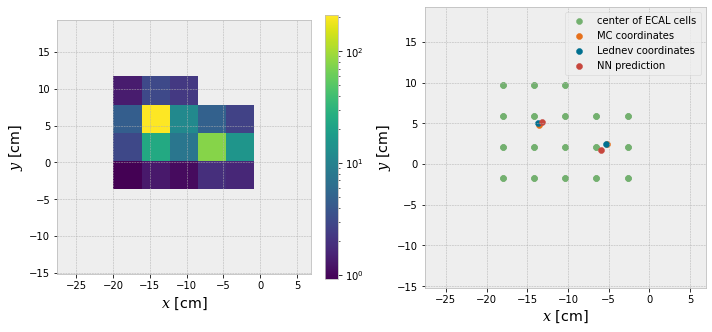

40


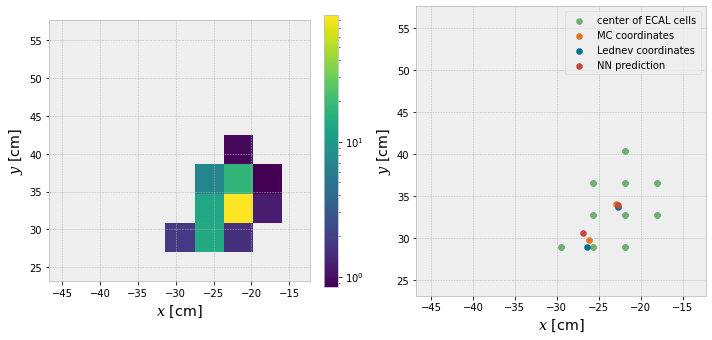

41


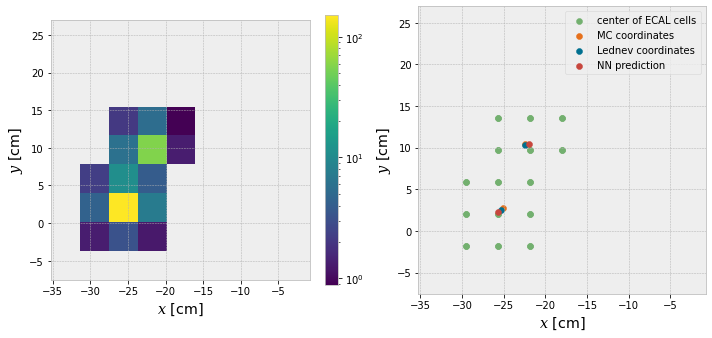

42


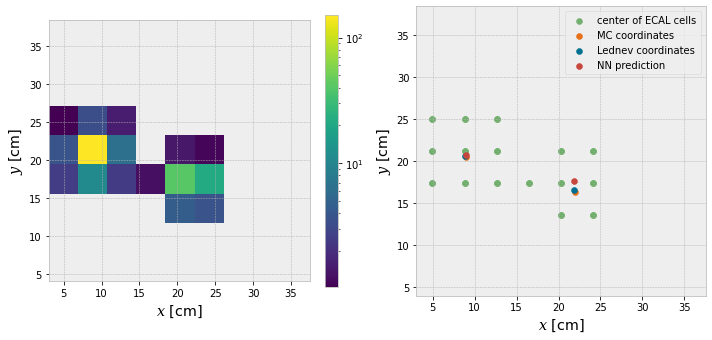

43


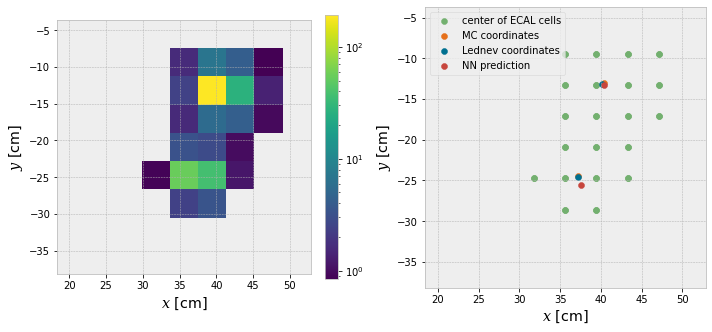

44


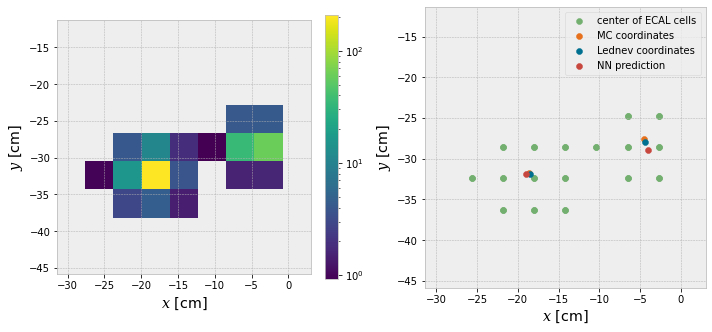

45


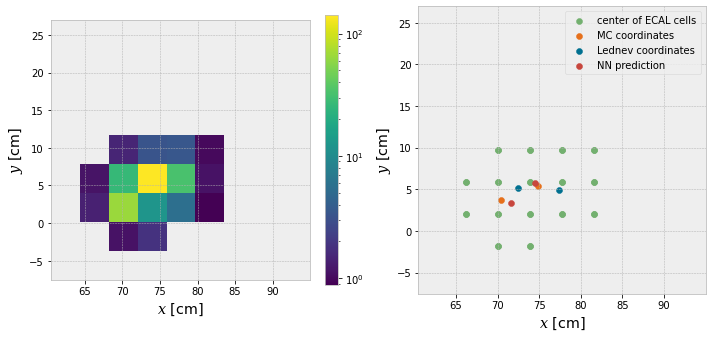

46


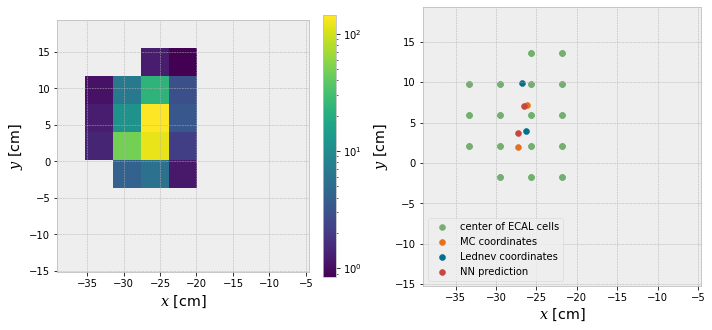

47


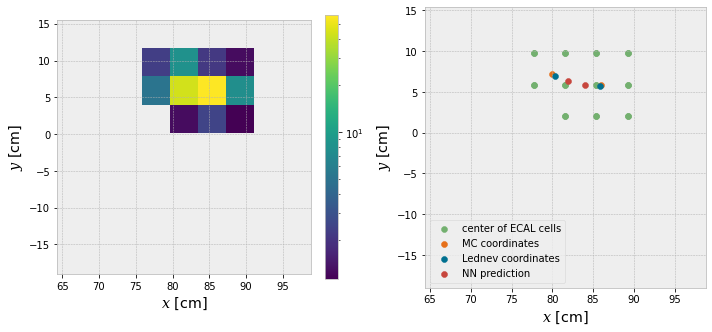

48


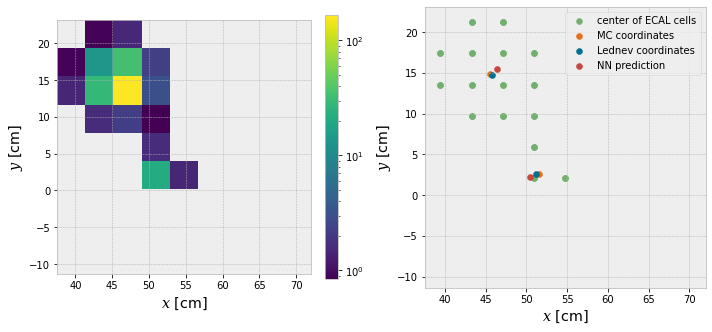

49


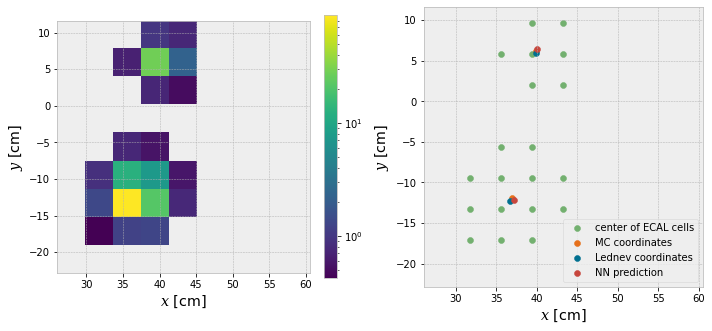

50


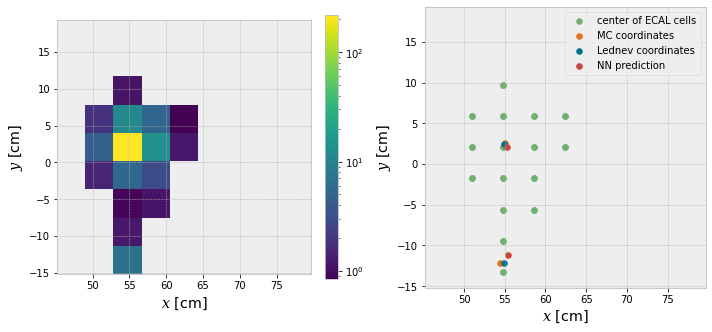

51


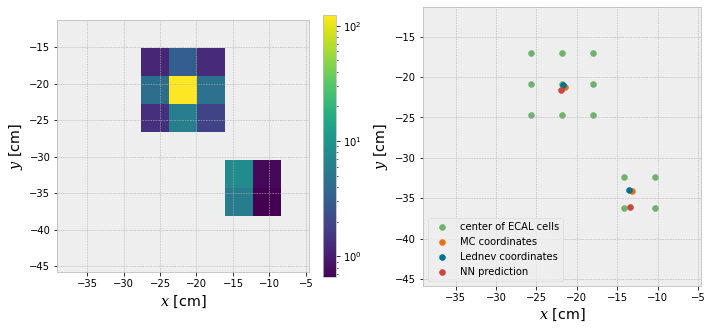

52


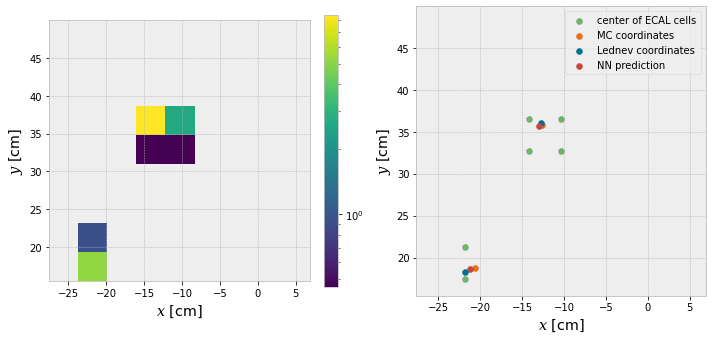

53


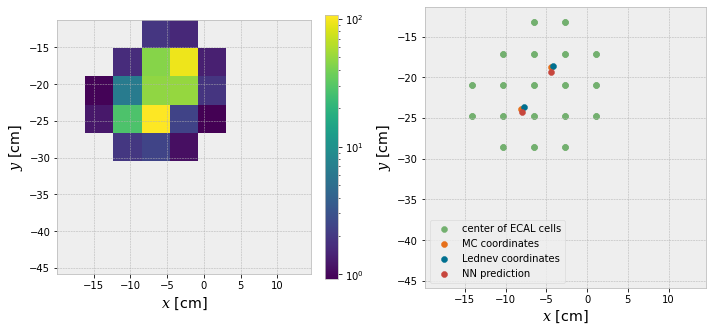

54


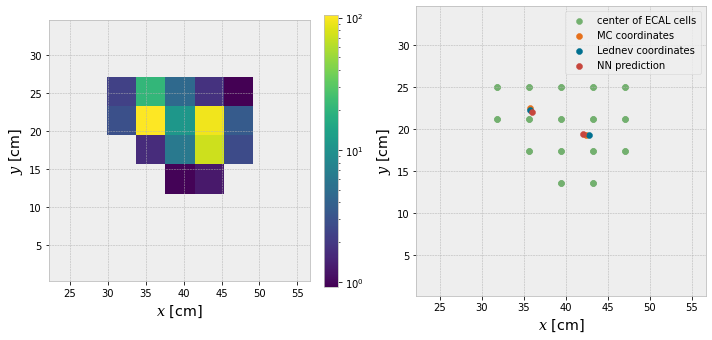

55


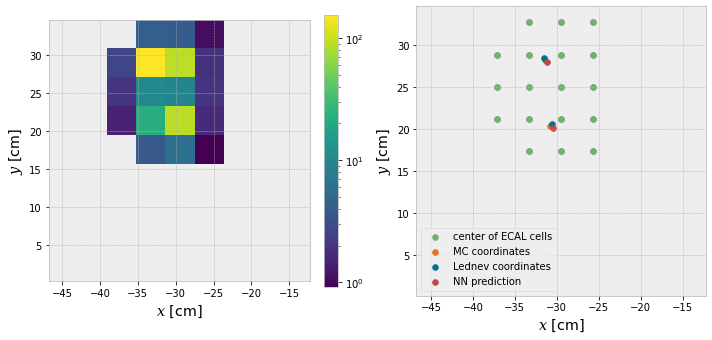

56


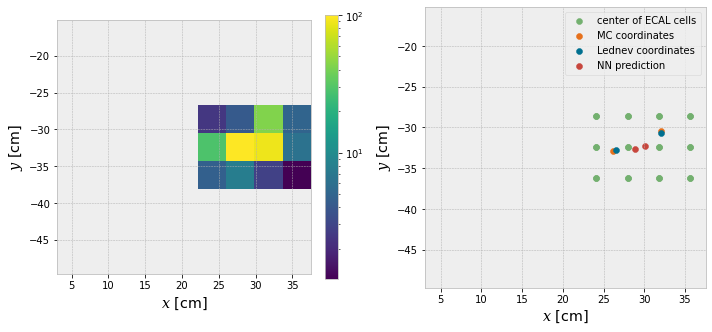

57


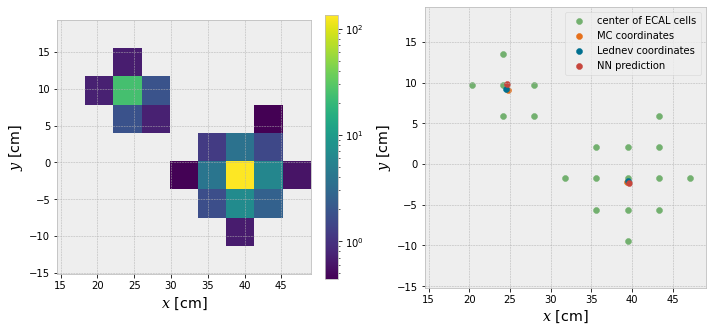

58


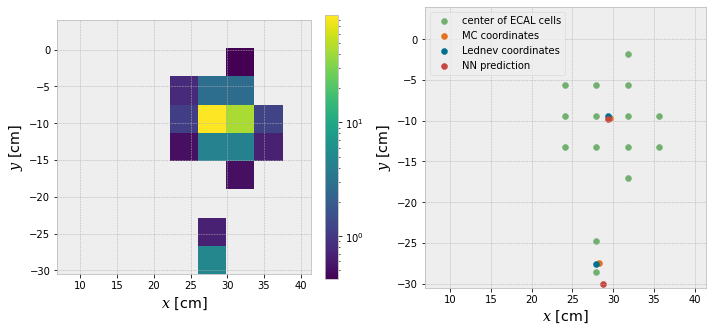

59


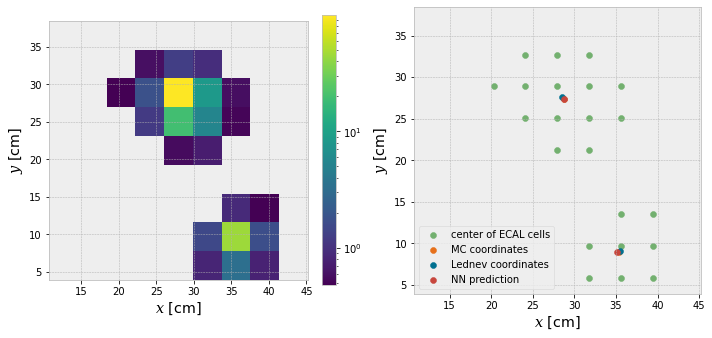

60


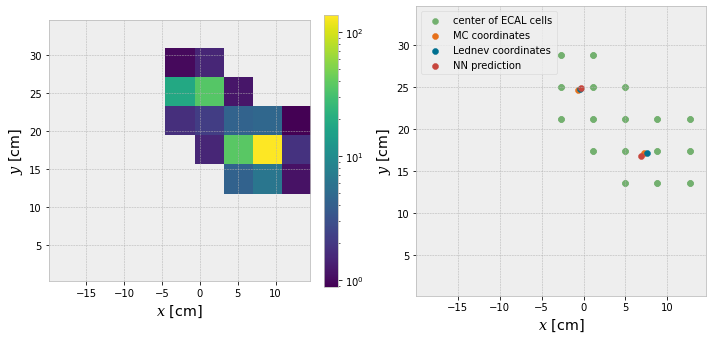

61


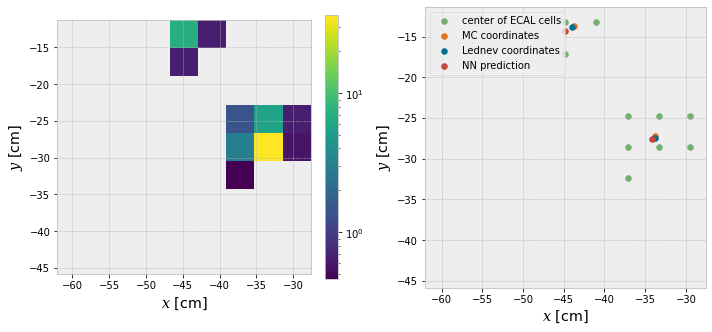

62


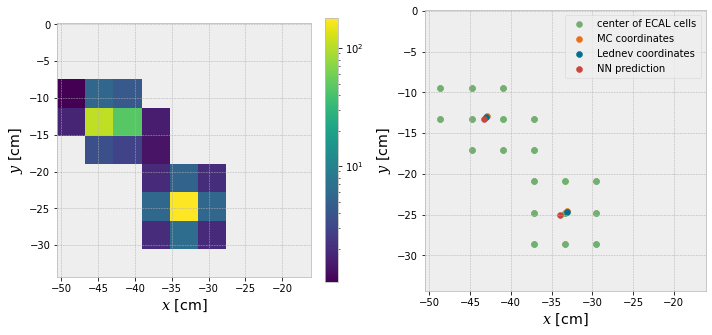

63


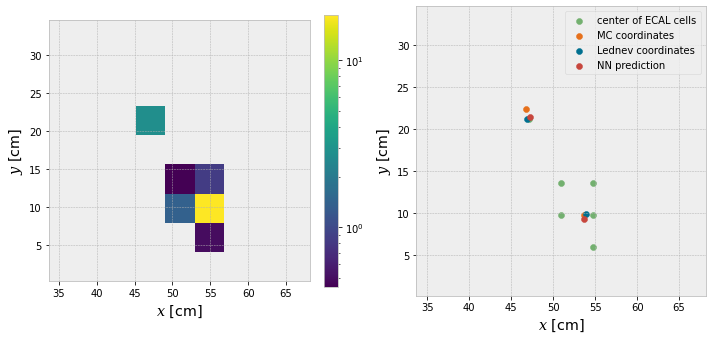

64


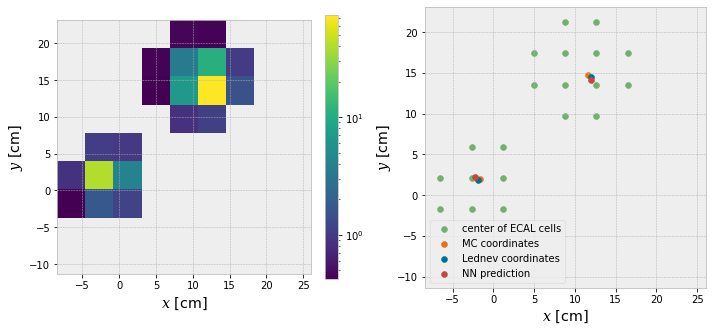

65


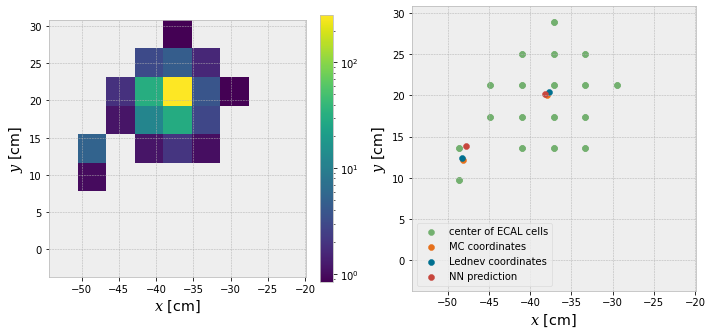

66


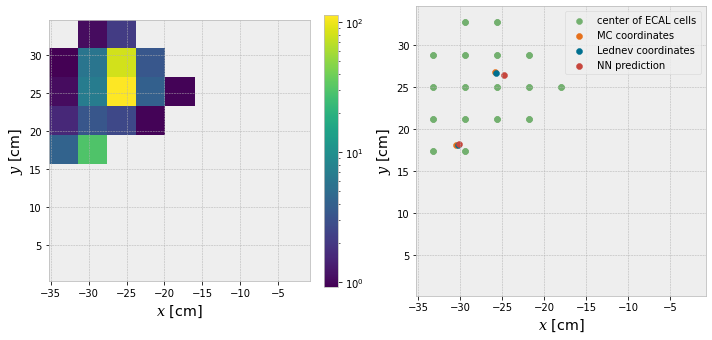

67


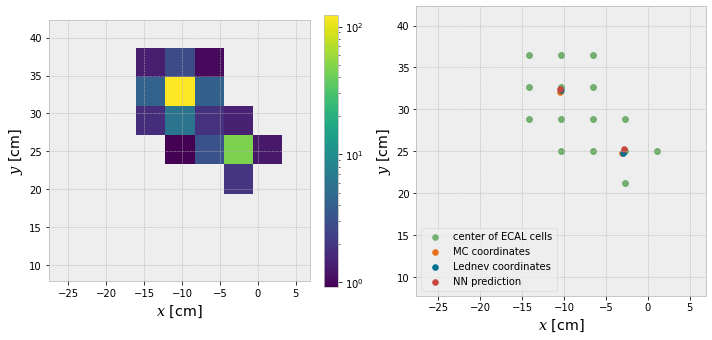

68


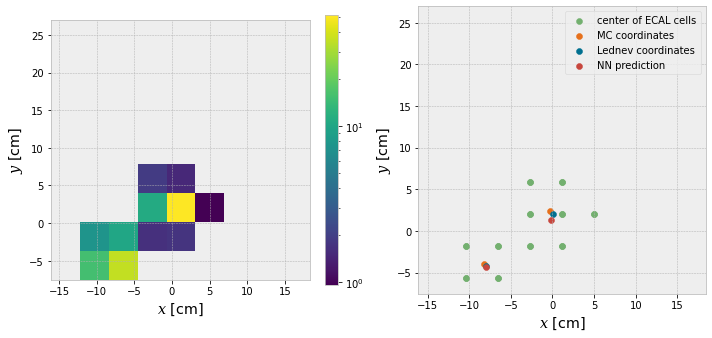

69


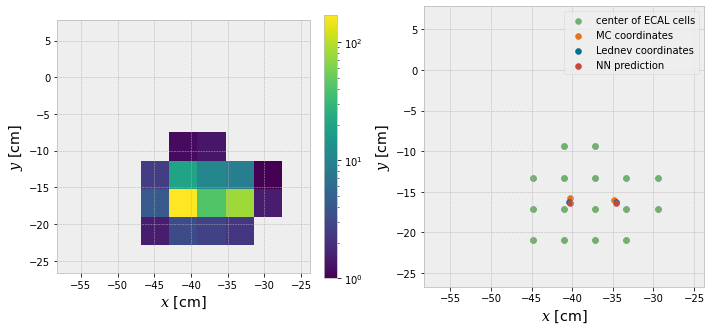

70


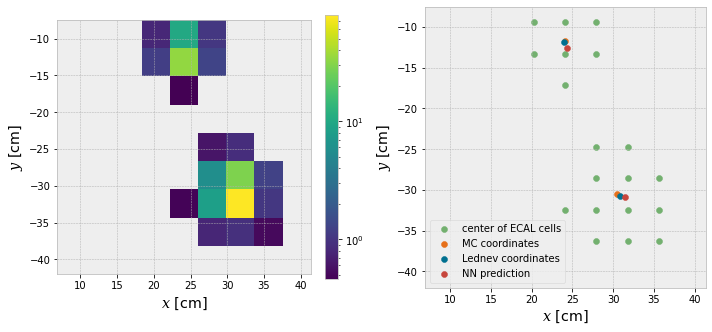

71


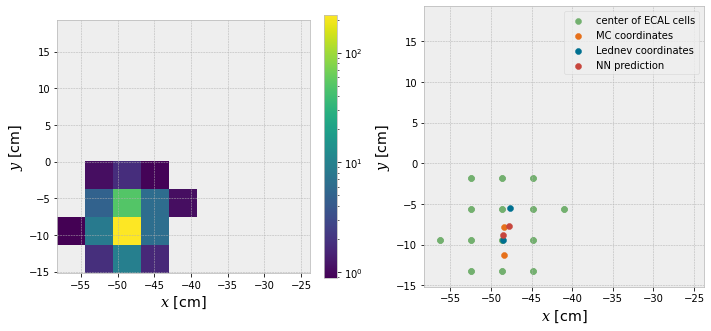

72


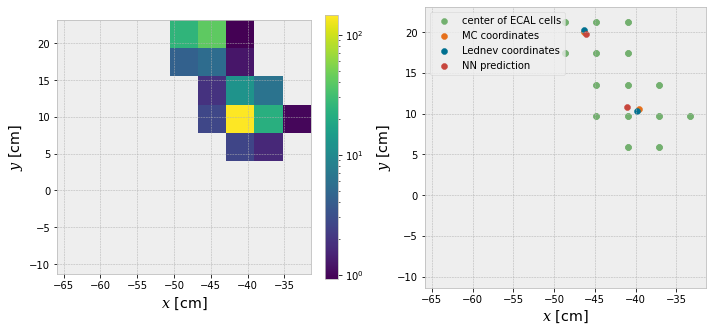

73


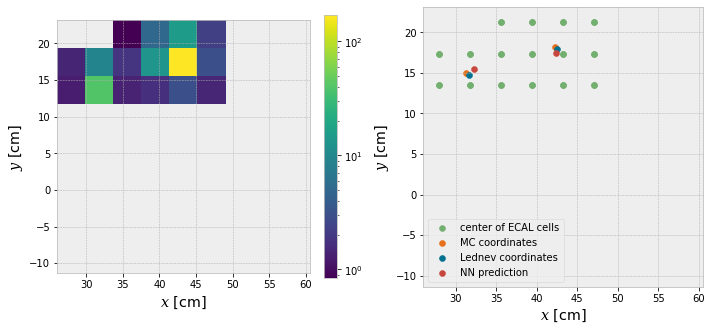

74


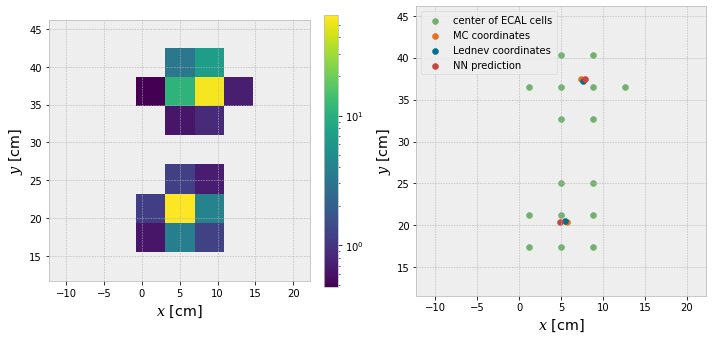

75


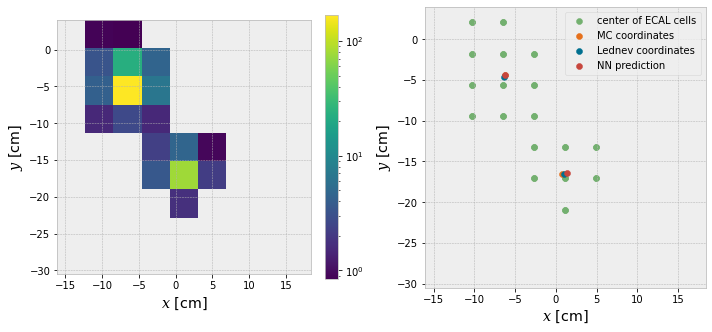

76


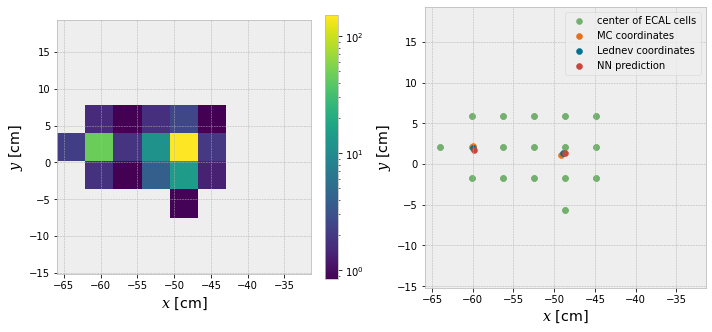

77


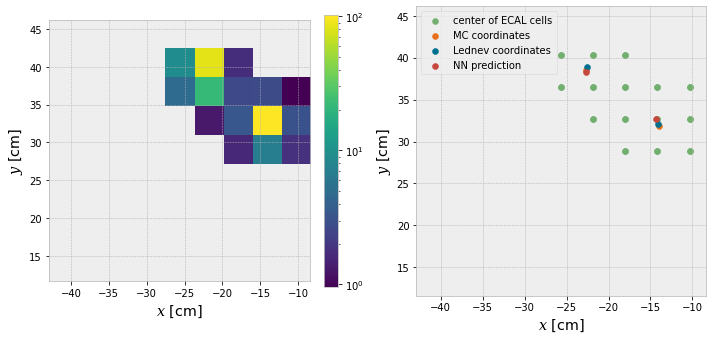

78


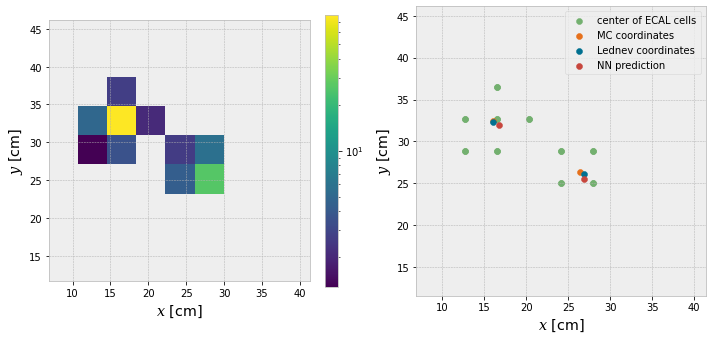

79


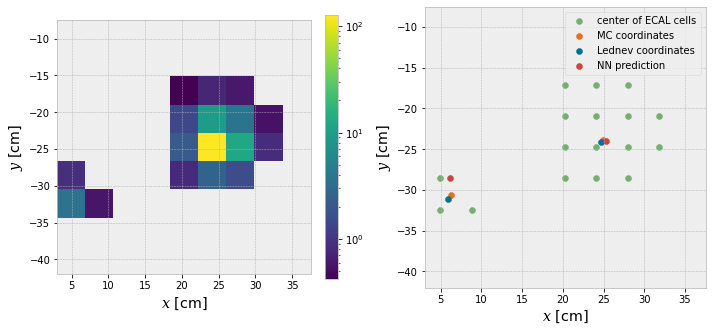

80


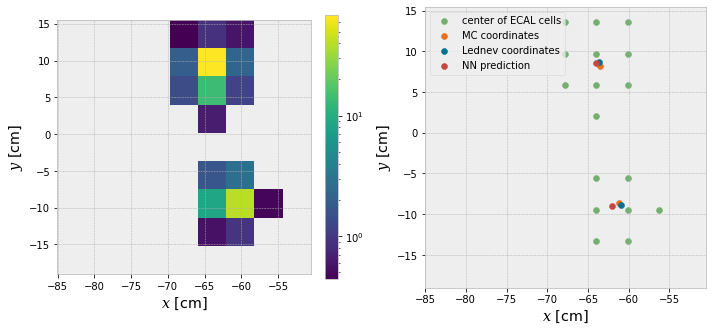

81


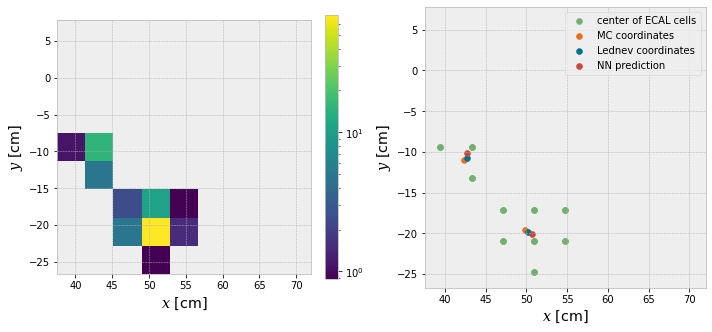

82


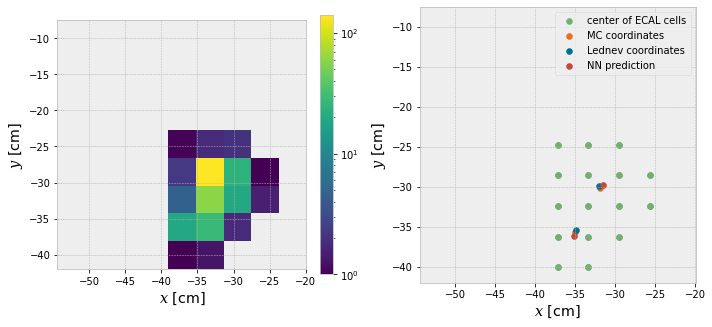

83


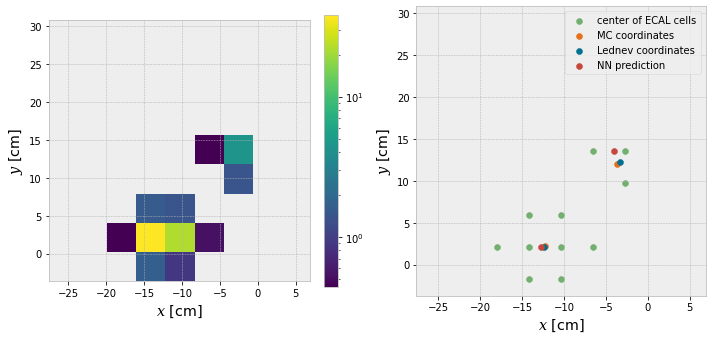

84


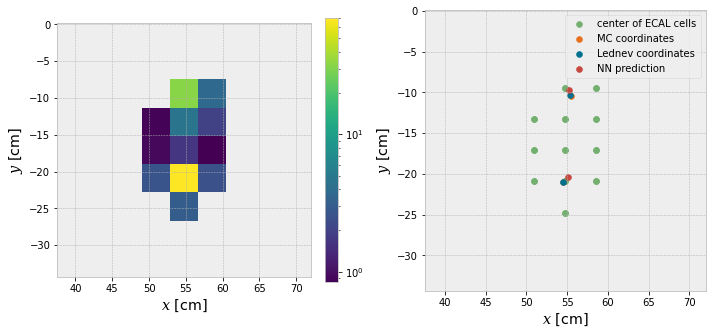

85


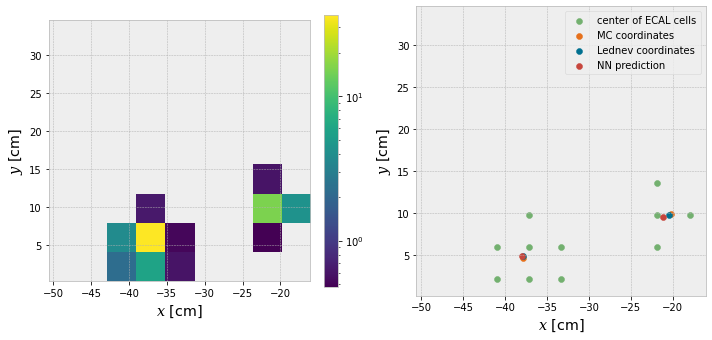

86


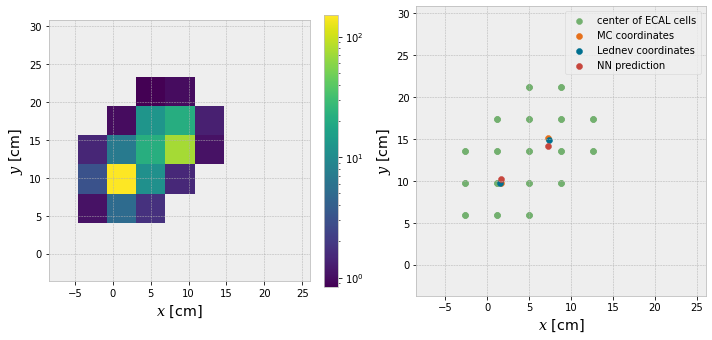

87


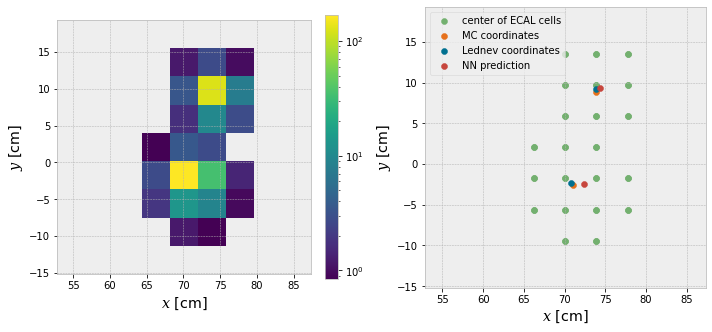

88


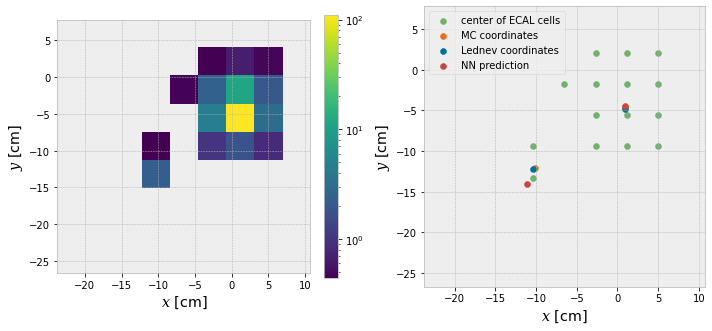

89


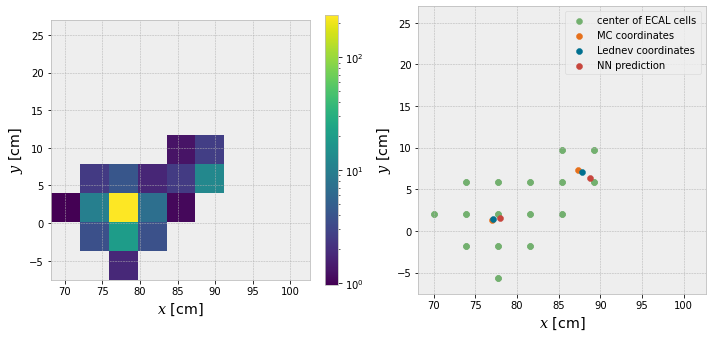

90


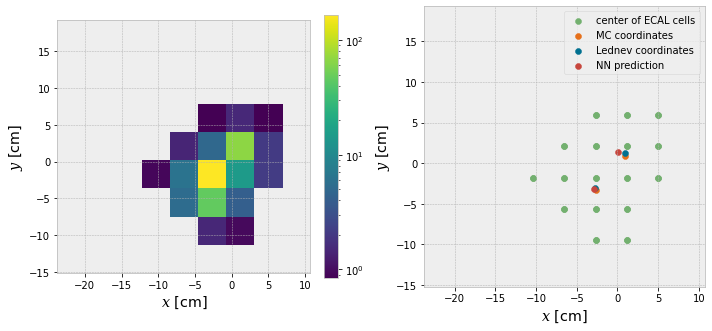

91


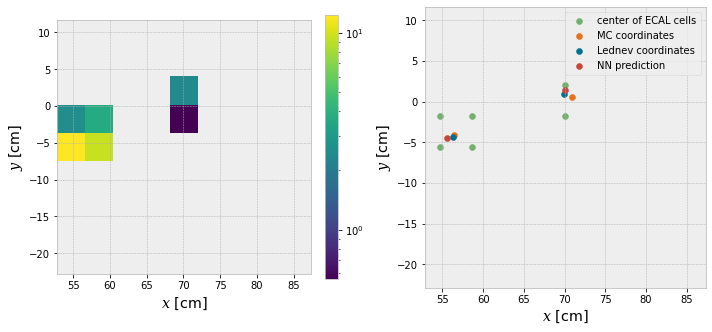

92


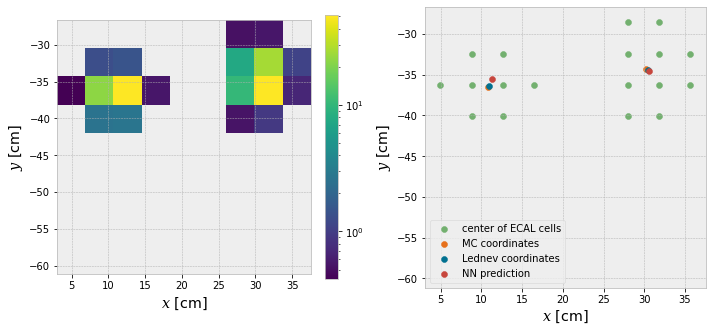

93


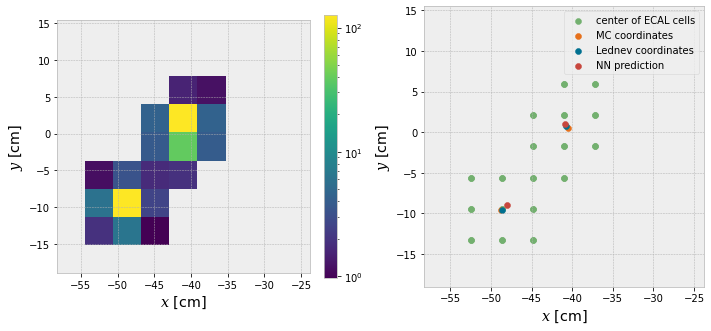

94


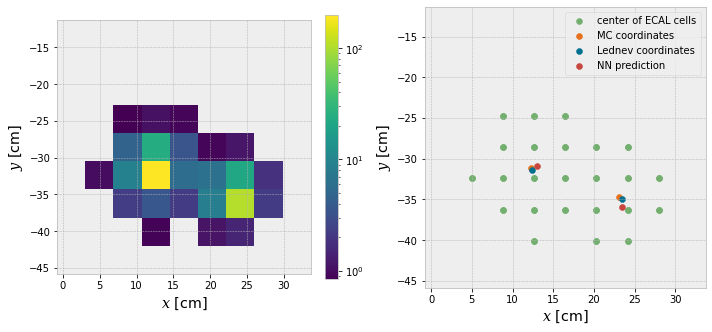

95


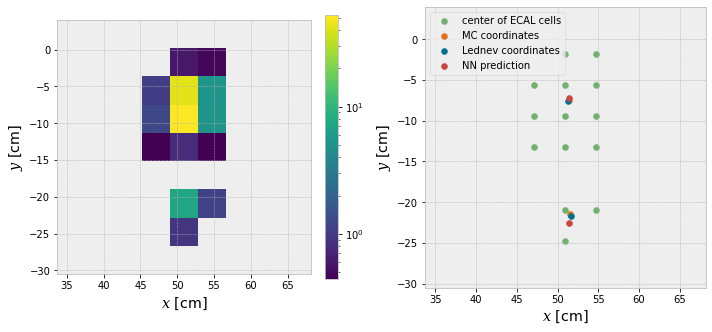

96


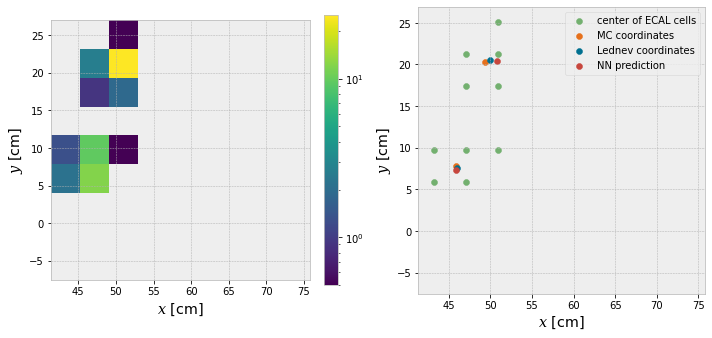

97


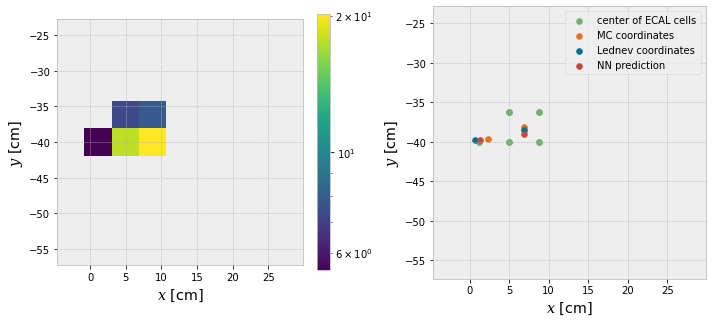

98


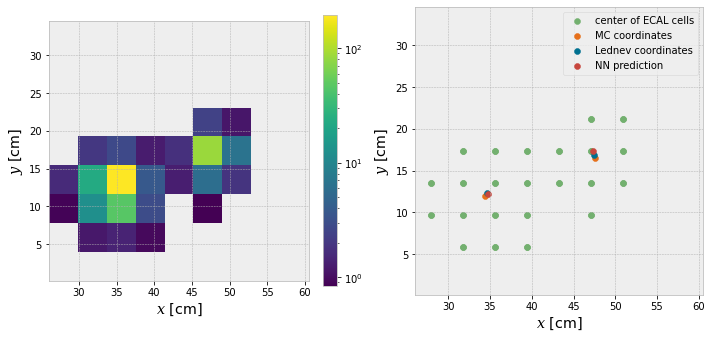

99


In [10]:
for i in range(100):
    ev.show_cluster_NNpred(i)
    print(i)